## Linear Regression Using Normal Equation

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1) ## random values from [0,2]
y = 4 + 3 * X + np.random.randn(100,1) ## general linear function y = 3 * x + 4 (with noise)

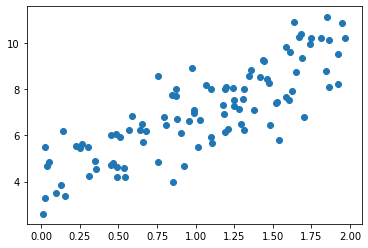

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [15]:
X

array([[1.29442913],
       [0.0212438 ],
       [1.17958971],
       [0.4622697 ],
       [0.53466273],
       [0.85124853],
       [1.5397124 ],
       [1.65196569],
       [0.95445527],
       [1.53015822],
       [1.84370909],
       [0.54254932],
       [1.92260481],
       [1.18907644],
       [1.43358592],
       [0.87570673],
       [0.35362019],
       [1.46228481],
       [0.51265205],
       [1.19455735],
       [0.65284809],
       [1.24737265],
       [0.09711984],
       [0.99224083],
       [1.94543283],
       [0.26682626],
       [1.67966698],
       [0.92390729],
       [0.75864186],
       [0.84813098],
       [1.63593417],
       [0.15617535],
       [1.01795123],
       [1.91986545],
       [1.18464723],
       [1.35705153],
       [0.75514986],
       [1.47777485],
       [1.34411487],
       [1.5182948 ],
       [0.0393764 ],
       [0.98903007],
       [0.79241399],
       [1.48176952],
       [1.31583941],
       [0.31061013],
       [0.45136474],
       [0.224

In [24]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

* each row in X is an instance of our data, while each column is a feature of each instance; therefore, we need to add x0 to our X variable (X_b) since each instance has two features (x0,x1 :: y_intercept,slope)

In [20]:
print(theta_best) ## never will be perfect with noise

[[3.97436295]
 [2.92513998]]


In [25]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.97436295],
       [9.8246429 ]])

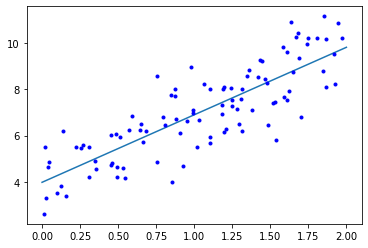

In [28]:
plt.plot(X_new,y_predict)
plt.plot(X,y,"b.")

### Scikit-Learn's version of Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[3.97436295] [[2.92513998]]


In [30]:
lin_reg.predict(X_new)

array([[3.97436295],
       [9.8246429 ]])

the LinearRegression class is based on the scipy.linalg.lstsq() function (least squares)

In [32]:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.97436295],
       [2.92513998]])

The function computes the pseudoinverse of X to get the minimum cost function, but this is really down in the weeds. (sigmoid = X^+ y)

In [33]:
np.linalg.pinv(X_b).dot(y) 

array([[3.97436295],
       [2.92513998]])

## Linear Regression Using Gradient Descent

* Refer to page 38 on notebook for more information

In [182]:
eta = 0.1 ## Learning Rate
n_iterations = 1000
m = 100 ## Number of instances in training

In [183]:
theta = np.random.randn(2,1)
theta

array([[1.17923791],
       [0.629855  ]])

In [184]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [185]:
theta

array([[3.97436295],
       [2.92513998]])

* Messing with the learning rate can severely change the performance of this algorithm 

## Linear Regression Using Stochastic Gradient Descent
* refer to page 42 on notebook for more information

In [198]:
n_epochs = 50
m_iter = 100
t0, t1 = 5, 50 ## Learning schedule hyperparameters

In [199]:
def learning_schedule(t):
    return t0 / (t + t1)

In [200]:
theta = np.random.randn(2,1) ## Random initializations

In [201]:
X_b[0:1]

array([[1.        , 1.29442913]])

In [202]:
## Note that the gradient is changing 5,000 times, while the gradient changes only 1,000 in Batch Gradient Descent
for epoch in range (n_epochs): ## 50 rounds of iterating over the training set (100 random numbers - size of the training data : may be overlap since they are chosen randomly)
    for i in range(m_iter):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) ## Only one instance is affecting the gradients, unlike batch gradient descent (**IMPORTANT DIFFERENCE**)
        eta = learning_schedule(epoch * m + i) ## update learning rate
        theta = theta - eta * gradients ## Calculate gradient descent step

In [203]:
theta

array([[4.00546572],
       [2.92884219]])

* The alogrithm above (Stochastic Gradient Descent) iterated over the training set only 50 times, while Batch Gradient Descent iterated over the training set 1,000 times

### Scikit-Learn's Linear Regression With Stochastic Gradient Descent

In [204]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None,eta0=0.1)

In [209]:
sgd_reg.fit(X,y.flatten())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [208]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.94571178]), array([2.91216616]))